# Custom features approach  
Based on https://www.kaggle.com/learn/time-series

In [34]:
import pandas as pd
from time_series_expenses.prepare_data import monthly

# We need time only on the index, not as a column
monthly = monthly.drop("ds", axis = 1)
monthly.head()

,y
Date,
2021-10-01,659.76
2021-11-01,840.82
2021-12-01,378.26
2022-01-01,825.94
2022-02-01,551.60


In [35]:
moving_average = monthly.rolling(
    window=12, # Since each month is a single data point, a year is 12 points and not 365
    center=True,
    min_periods=6
).mean()

<Axes: xlabel='Date'>

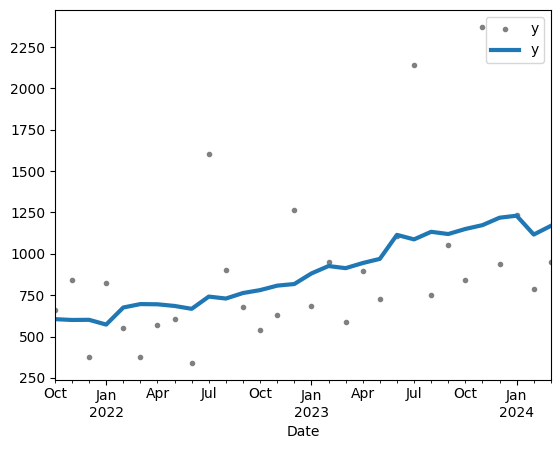

In [36]:
ax = monthly.plot(style = ".", color = "0.5")
moving_average.plot(
    ax = ax, linewidth = 3
)

In [37]:
# Using the statsmodel to model a time series
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(
    index = monthly.index,
    constant = True,
    order = 1,
    drop = True
)

X = dp.in_sample()
X.head()

,const,trend
Date,,
2021-10-01,1.0,1.0
2021-11-01,1.0,2.0
2021-12-01,1.0,3.0
2022-01-01,1.0,4.0
2022-02-01,1.0,5.0


In [38]:
from sklearn.linear_model import LinearRegression

y = monthly.y

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

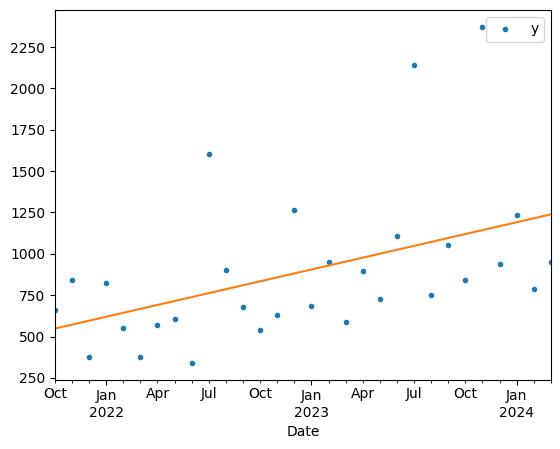

In [39]:
ax = monthly.plot(style = ".")
_ = y_pred.plot(ax = ax)